In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import seaborn as sns
%matplotlib inline

In [2]:
random_state = 123

In [3]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items.csv"
food_df = pd.read_csv(dataset_url)

In [4]:
food_df.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'


In [5]:
food_df.dtypes

Calories               float64
Total Fat                int64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Trans Fat              float64
Cholesterol              int64
Sodium                 float64
Total Carbohydrate     float64
Dietary Fiber          float64
Sugars                 float64
Sugar Alcohol            int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                     int64
class                   object
dtype: object

In [6]:
food_df['class'].value_counts()

class
'In Moderation'    6649
'Less Often'       5621
'More Often'        990
Name: count, dtype: int64

In [7]:
feature_cols = list(food_df.iloc[:, 0:-1].columns)
feature_cols


['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

In [8]:
food_df.iloc[:,0:-1].describe()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000
mean,133.861086,4.475264,1.450617,0.338069,0.254660,0.047459,8.857692,241.867142,18.232020,1.602971,6.645234,0.117949,4.661333,6.287632,6.741855,5.175264,5.235671
std,94.227650,5.386340,2.410318,1.345852,2.230586,0.321402,20.976530,272.284363,14.786316,3.363879,8.328465,1.121529,5.611143,18.374191,23.785100,8.779637,9.119459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,135.000000,17.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000
75%,180.000000,7.000000,2.000000,0.000000,0.000000,0.000000,10.000000,370.000000,27.000000,2.000000,11.000000,0.000000,7.000000,6.000000,2.000000,6.000000,8.000000
max,2210.000000,43.000000,22.000000,40.000000,235.000000,11.000000,450.000000,2431.000000,270.000000,305.000000,115.000000,31.000000,70.000000,622.000000,1000.000000,110.000000,170.000000


In [9]:
food_df.iloc[:, -1:].value_counts(normalize=True)

class          
'In Moderation'    0.501433
'Less Often'       0.423906
'More Often'       0.074661
Name: proportion, dtype: float64

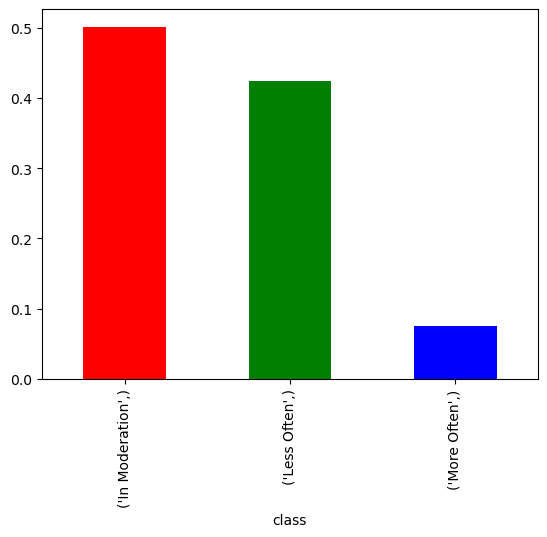

In [11]:
food_df.iloc[:, -1:].value_counts(normalize=True).plot.bar(color=['Red', 'Green', 'Blue'])
plt.show()

In [12]:
X_raw = food_df.iloc[:, :-1]
y_raw = food_df.iloc[:, -1:]

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_raw)

In [14]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


In [17]:
l_encoder = LabelEncoder()
y = l_encoder.fit_transform(y_raw.values.ravel())
#ravel function flattens the vector

In [18]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([6649, 5621,  990], dtype=int64))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (10608, 17), y_train: (10608,)
Testing dataset shape, X_test: (2652, 17), y_test: (2652,)


In [25]:
penalty = 'l2'
multi_class = 'multinomial'
solver = 'lbfgs'
max_iteration = 1000


In [26]:
l2_model = LogisticRegression(random_state=random_state, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iteration)

In [27]:
l2_model.fit(X_train, y_train)
yhat_l2 = l2_model.predict(X_test)


c:\Users\M-TT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [33]:
def evaluate(y_true, y_pred):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(y_true, y_pred)
    precision, recall, fbeta, _ = precision_recall_fscore_support(y_true, y_pred)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['fbeta'] = fbeta
    return results_pos


In [34]:
result = evaluate(y_test, yhat_l2)

In [35]:
result

{'accuracy': 0.7748868778280543,
 'recall': array([0.87368421, 0.73220641, 0.35353535]),
 'precision': array([0.73035827, 0.83553299, 0.92105263]),
 'fbeta': array([0.79561794, 0.78046468, 0.51094891])}

In [36]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

In [38]:
l1_model = LogisticRegression(random_state=random_state, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)

In [39]:
l1_model.fit(X_train, y_train)

c:\Users\M-TT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=123, solver='saga')

In [40]:
l1_preds = l1_model.predict(X_test)

In [41]:
odd_ratios = l1_model.predict_proba(X_test[:1, :])[0]
odd_ratios

array([3.55065558e-02, 9.64491964e-01, 1.47991419e-06])

In [42]:
l1_model.predict(X_test[:1, :])[0]

1

In [44]:
evaluate(y_test, l1_preds)

{'accuracy': 0.8092006033182504,
 'recall': array([0.85488722, 0.74377224, 0.87373737]),
 'precision': array([0.78848821, 0.83516484, 0.8277512 ]),
 'fbeta': array([0.82034632, 0.78682353, 0.85012285])}

In [45]:
cf = confusion_matrix(y_test, l1_preds, normalize='true')

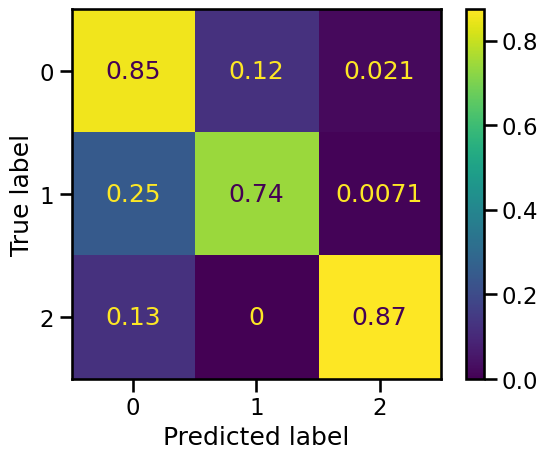

In [47]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=l1_model.classes_)
disp.plot()
plt.show()

In [48]:
l1_model.coef_

array([[ 1.02260612e+01,  0.00000000e+00,  0.00000000e+00,
         5.28211590e+00,  0.00000000e+00, -3.70560617e+00,
         0.00000000e+00,  9.11923717e-01,  0.00000000e+00,
         2.26627496e+01,  0.00000000e+00,  0.00000000e+00,
         4.30564271e+00,  1.36942545e-01,  0.00000000e+00,
         1.83340368e+00, -2.06761520e-02],
       [ 0.00000000e+00,  4.20223530e+00,  2.46648466e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.94277520e+00,  0.00000000e+00,  1.32251480e+00,
        -6.79834695e+00,  1.51669845e+01,  3.46648083e+00,
         0.00000000e+00, -1.71144958e+00,  0.00000000e+00,
        -1.47866235e-01,  0.00000000e+00],
       [-1.11431018e+02, -2.91410454e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.59642876e+00, -4.13437893e+01,
         0.00000000e+00, -9.27079323e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

In [49]:
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef

    coef_dict = {k:v for k,v in sorted(coef_dict.items(), key = lambda item: item[1])}
    return coef_dict



In [50]:
# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

In [51]:

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

In [52]:
coef_dict = get_feature_coefs(l1_model, 1, feature_cols)

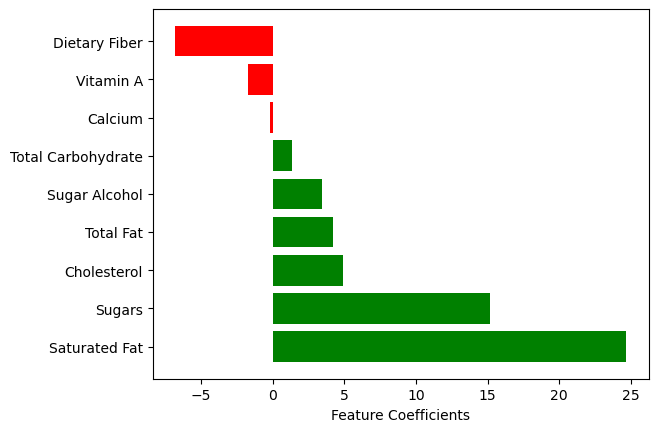

In [53]:
visualize_coefs(coef_dict)

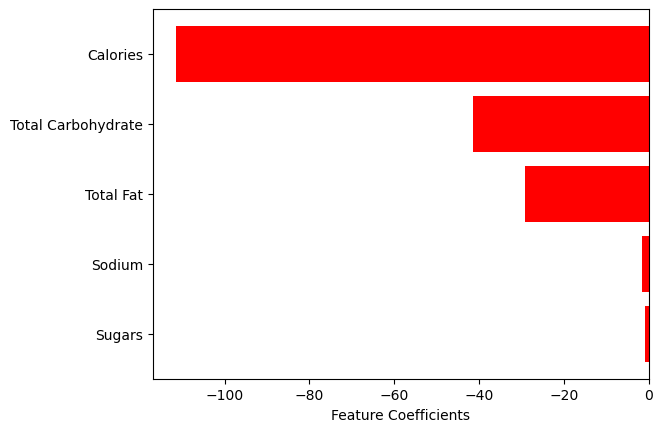

In [54]:
# Coefficients for Class 2
coef_dict = get_feature_coefs(l1_model, 2, feature_cols)
visualize_coefs(coef_dict)

In [55]:
en_model = LogisticRegression(penalty='elasticnet', random_state=random_state, max_iter=1000, multi_class=multi_class, solver='saga', l1_ratio=0.5)
en_model.fit(X_train, y_train)
yhat_en = en_model.predict(X_test)


c:\Users\M-TT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [56]:
evaluate(y_test, yhat_en)

{'accuracy': 0.7907239819004525,
 'recall': array([0.86691729, 0.73220641, 0.61111111]),
 'precision': array([0.75310255, 0.83723296, 0.87681159]),
 'fbeta': array([0.80601188, 0.78120551, 0.7202381 ])}

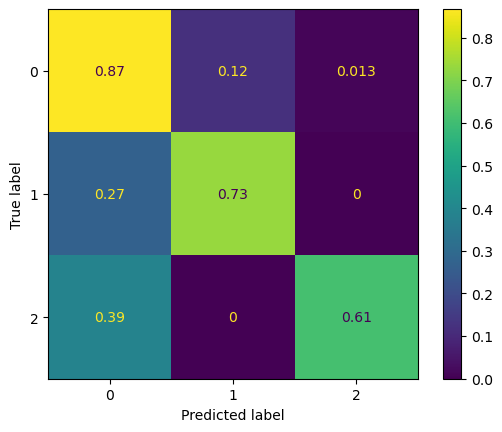

In [59]:
cf_en = confusion_matrix(y_test, yhat_en, normalize='true')
disp = ConfusionMatrixDisplay(cf_en, display_labels=en_model.classes_)
disp.plot()

plt.show()